# Llama 3.2 Multimodal Prompting

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from utils import load_env
load_env()

## Text input only question

In [3]:
from utils import llama32

In [4]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"}
]

In [5]:
response_32 = llama32(messages, 90)
print(response_32)

The book "Charlotte's Web" was written by E.B. White.


## Reprompting with new question

In [7]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"},
      {"role": "assistant",
    "content": response_32},
      {"role": "user",
    "content": "3 of the best quotes"}
]

In [8]:
response_32 = llama32(messages,90)
print(response_32)

Here are three of the most famous and beloved quotes from "Charlotte's Web":

1. **"You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hustling and bustling about, trying to find something to eat and a place to sleep, and then, of course, there's the web. But I wouldn't trade it. It's a pretty good life, if you ask me."**

— Charlotte (Chapter 21)

2. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

— Narrator (Chapter 22)

3. **"You've got a friend in me, Wilbur."**

— Charlotte (Chapter 9)

These quotes capture the essence of the story, highlighting the themes of friendship, loyalty, and the fleeting nature of life.


## Question about an image

In [9]:
from utils import disp_image

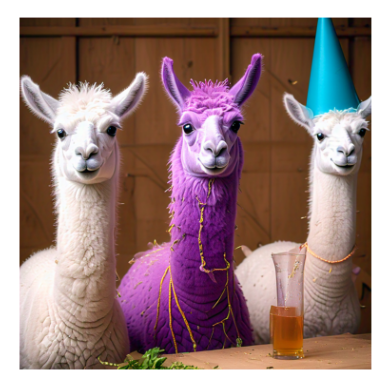

In [10]:
disp_image("images/Llama_Repo.jpeg") # Example usage for local image

### Using a local image

In [11]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image("images/Llama_Repo.jpeg")

In [13]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
]

In [14]:
result = llama32(messages,90)
print(result)

The image depicts three llamas, one of which is wearing a party hat, sitting at a table with a glass of liquid in front of them.


## Follow up question about an image

In [16]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
  {"role": "assistant", "content": result},
  {"role": "user", "content": "how many of them are purple?"}
]

In [17]:
result = llama32(messages)
print(result)

One of the llamas is purple.


### Define llama32pi() helper

In [19]:
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]
  result = llama32(messages, model_size)
  return result

In [20]:
print(llama32pi("describe the image in one sentence",
                f"data:image/jpeg;base64,{base64_image}"))

The image depicts three llamas, one of which is wearing a party hat, sitting at a table with a glass of liquid in front of them.


## Plant recognition

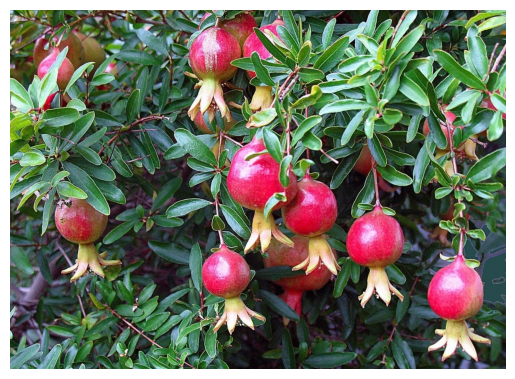

In [21]:
disp_image("images/tree.jpg")

In [22]:
question = ("What kind of plant is this in my garden?"
            "Describe it in a short paragraph.")

In [23]:
base64_image = encode_image("images/tree.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The plant in your garden is a pomegranate tree, scientifically known as Punica granatum. It is a deciduous shrub or small tree that can grow up to 12 feet tall. The leaves are dark green, glossy, and oval-shaped, with a pointed tip. The flowers are red and bell-shaped, and they bloom in the spring. The fruit is a large, leathery berry with a hard, woody rind that contains hundreds of juicy arils, which are the edible seeds surrounded by a fleshy pulp. Pomegranate trees prefer full sun and well-drained soil, and they are relatively low-maintenance. They are also drought-tolerant, but they will produce more fruit if they receive regular watering.


## Dog breed recognition

In [ ]:
disp_image("images/ww1.jpg")

In [ ]:
question = (("What dog breed is this? Describe in one paragraph,"
             "and 3-5 short bullet points"))
base64_image = encode_image("images/ww1.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

In [ ]:
disp_image("images/ww2.png")

In [ ]:
base64_image = encode_image("images/ww2.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

## Tire pressure warning

In [ ]:
disp_image("images/tire_pressure.png")

In [ ]:
question = (("What's the problem this is about?"
             " What should be good numbers?"))

In [ ]:
base64_image = encode_image("images/tire_pressure.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)